In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#preprocessing
X = train.drop('label', axis=1)
y = train['label']

#Normalize the pixel values
x = X /255.0

#Split the data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

In [10]:
X_train_pca.shape, X_val_pca.shape

((33600, 153), (8400, 153))

In [18]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

models = {

          'SVM': SVC(kernel='rbf',C=1.0),
          'KNN': KNeighborsClassifier(n_neighbors=3),
          'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
          'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
          'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
          'Logistic Regression': LogisticRegression(max_iter=1000,random_state=42),
          'Gaussian Naive Bayes': GaussianNB(),
          'Decision Tree': DecisionTreeClassifier(random_state=42),
          'LDA': LinearDiscriminantAnalysis(),
          'XGBoost': XGBClassifier(n_estimators=100, random_state=42)
}

In [19]:
#Model Testing in a Loop
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    results[model_name] = accuracy_score(y_val, y_pred)
    print(f"{model_name} Accuracy: {results[model_name]}")
    print(classification_report(y_val, y_pred))
    print("-"*50)

SVM Accuracy: 0.973452380952381
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.98      0.99      0.99       909
           2       0.98      0.97      0.97       846
           3       0.97      0.96      0.96       937
           4       0.96      0.97      0.97       839
           5       0.97      0.97      0.97       702
           6       0.98      0.99      0.98       785
           7       0.98      0.97      0.97       893
           8       0.97      0.97      0.97       835
           9       0.96      0.96      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

--------------------------------------------------
KNN Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1    

In [21]:
from sklearn.model_selection import cross_val_score
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Perform cross-validation on the full training set
cross_val_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

# Calculate the mean accuracy across all folds
mean_accuracy = cross_val_scores.mean()

print(f"Cross-Validation Accuracy of the Best Model: {mean_accuracy:.4f}")

Cross-Validation Accuracy of the Best Model: 0.9735


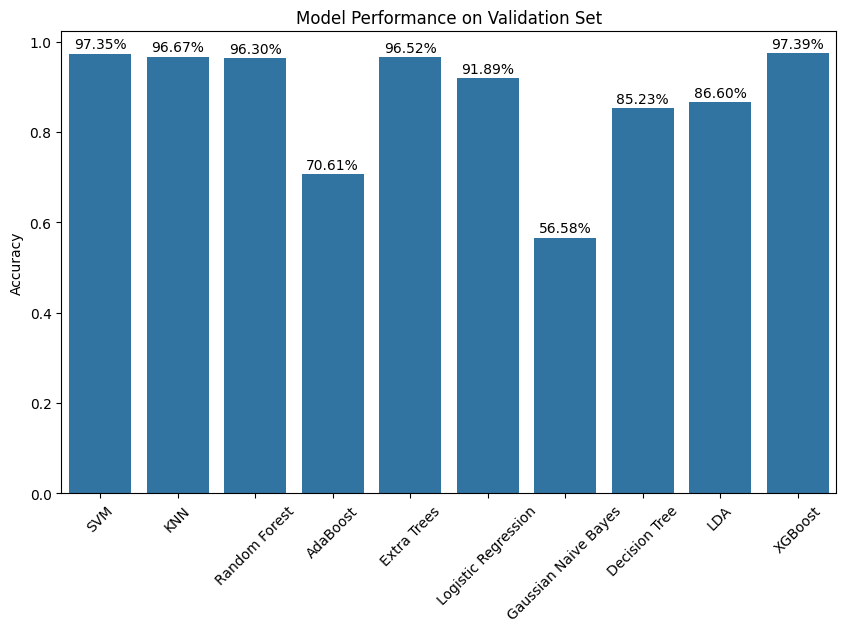

In [22]:
# Bar plot of model performance
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Performance on Validation Set')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
for i, value in enumerate(list(results.values())):
    plt.text(i, value + 0.005, f'{value:.2%}', ha='center', va='bottom', fontsize=10)

plt.show()